# Etapa 3 – Modelo Baseline: Regressão Linear

**Dataset:** `data/youtube_clean.csv`  
**Target:** `total_views`  
**Modelo:** Regressão Linear (baseline)  
**Data:** Novembro 2025  

---
**Correções aplicadas:**
- Remoção definitiva de 5 valores NaN restantes
- Garantia de dataset 100% limpo antes do treino
- Gráficos profissionais + interpretação pronta para apresentação

In [16]:
# ===========================================================================
# IMPORTS E CONFIGURAÇÕES
# ===========================================================================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Estilo dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("Bibliotecas carregadas!")

Bibliotecas carregadas!


In [17]:
# ===========================================================================
# 1. CARREGAR E LIMPAR DEFINITIVAMENTE O DATASET
# ===========================================================================
df = pd.read_csv('/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/notebooks/data/youtube_clean.csv')

print(f"Dataset original: {df.shape[0]:,} linhas × {df.shape[1]} colunas")
print(f"Valores faltantes antes da correção: {df.isnull().sum().sum()}")

# REMOVER qualquer NaN restante (o que estava causando o erro)
df = df.dropna().reset_index(drop=True)

print(f"Após remoção de NaN: {df.shape[0]:,} linhas")
print(f"Valores faltantes finais: {df.isnull().sum().sum()}")
assert df.isnull().sum().sum() == 0
print("Dataset 100% limpo e pronto para modelagem!")

df.head()

Dataset original: 2,515 linhas × 49 colunas
Valores faltantes antes da correção: 5
Após remoção de NaN: 2,510 linhas
Valores faltantes finais: 0
Dataset 100% limpo e pronto para modelagem!


,video_id,duration_minutes,title_length,description_length,tags_count,channel_subscribers,channel_age_months,previous_videos_count,avg_upload_frequency_days,comments_count,...,has_subtitles_Sim,promoted_Sim,upload_time_Manhã,upload_time_Noite,upload_time_Tarde,upload_day_Seg-Qui,upload_day_Sexta,upload_day_Sábado,engagement_rate,content_density
0,VID00197,-1.565034,-0.055048,0.193687,0.635774,-1.320126,-0.002781,1.088175,-0.770316,-0.736883,...,0,0,0,0,1,0,1,0,0.822622,3.704508
1,VID00987,1.509381,1.553460,0.000177,-0.528804,1.001506,-0.002781,-1.520095,-0.196730,1.677566,...,0,1,0,0,1,0,1,0,-0.026465,-0.552713
2,VID01091,0.808199,-0.744409,-1.345246,-0.323290,0.644853,-0.015753,-1.287336,-1.688055,0.726281,...,0,0,1,0,0,1,0,0,-0.023847,-0.481264
3,VID00388,-1.295348,-1.625259,-1.008947,-1.419364,-0.923167,0.706182,-1.054577,-0.655599,1.604391,...,1,0,0,0,0,0,0,1,-0.006064,-0.466880
4,VID02222,1.293633,1.515162,0.409357,1.594839,0.855532,-1.546255,-0.287842,-0.311447,-0.670070,...,0,0,1,0,0,0,0,0,-0.023566,-0.260960


In [18]:
# ===========================================================================
# 2. SEPARAR FEATURES (X) E TARGET (y)
# ===========================================================================
TARGET = 'total_views'
ID_COL = 'video_id'

X = df.drop(columns=[TARGET, ID_COL], errors='ignore')
y = df[TARGET]

print(f"Features utilizadas: {X.shape[1]} colunas")
print(f"Target: {TARGET}")
print(f"Total de amostras: {len(df):,}")

Features utilizadas: 47 colunas
Target: total_views
Total de amostras: 2,510


In [19]:
# ===========================================================================
# 3. DIVISÃO 60% TREINO │ 20% VALIDAÇÃO │ 20% TESTE
# ===========================================================================
RANDOM_STATE = 42

# Primeiro: separar 20% para teste (guardado para Etapa 5)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE
)

# Dos 80% restantes → 25% para validação = 20% do total
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE
)

print(f"Treino     : {len(X_train):4,} amostras ({len(X_train)/len(df)*100:5.1f}%)")
print(f"Validação  : {len(X_val):4,} amostras ({len(X_val)/len(df)*100:5.1f}%)")
print(f"Teste      : {len(X_test):4,} amostras ({len(X_test)/len(df)*100:5.1f}%)")

print("\nDistribuição do target (média de views):")
print(f"Treino     : {y_train.mean():,.0f}")
print(f"Validação  : {y_val.mean():,.0f}")
print(f"Teste      : {y_test.mean():,.0f}")

Treino     : 1,506 amostras ( 60.0%)
Validação  :  502 amostras ( 20.0%)
Teste      :  502 amostras ( 20.0%)

Distribuição do target (média de views):
Treino     : 850,806
Validação  : 878,410
Teste      : 871,142


In [20]:
# ===========================================================================
# 4. TREINAR MODELO BASELINE (Regressão Linear)
# ===========================================================================
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("MODELO TREINADO COM SUCESSO!")

MODELO TREINADO COM SUCESSO!


In [21]:
# ===========================================================================
# 5. MÉTRICAS DE PERFORMANCE
# ===========================================================================
def calcular_metricas(y_true, y_pred):
    return {
        'R²'  : r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE' : mean_absolute_error(y_true, y_pred)
    }

y_train_pred = modelo.predict(X_train)
y_val_pred   = modelo.predict(X_val)

metrics_train = calcular_metricas(y_train, y_train_pred)
metrics_val   = calcular_metricas(y_val,   y_val_pred)

print("MÉTRICAS FINAIS")
print("─" * 50)
print(f"TREINO     → R² = {metrics_train['R²']:.4f}  |  RMSE = {metrics_train['RMSE']:,.0f}  |  MAE = {metrics_train['MAE']:,.0f}")
print(f"VALIDAÇÃO  → R² = {metrics_val['R²']:.4f}  |  RMSE = {metrics_val['RMSE']:,.0f}  |  MAE = {metrics_val['MAE']:,.0f}")

# Verificar overfitting
diff_r2 = abs(metrics_train['R²'] - metrics_val['R²'])
print(f"\nDiferença R² (treino × validação): {diff_r2:.4f}")
print("OK, sem overfitting significativo" if diff_r2 < 0.10 else "ATENÇÃO: possível overfitting")

MÉTRICAS FINAIS
──────────────────────────────────────────────────
TREINO     → R² = 0.5927  |  RMSE = 442,510  |  MAE = 220,901
VALIDAÇÃO  → R² = 0.5924  |  RMSE = 459,964  |  MAE = 231,979

Diferença R² (treino × validação): 0.0003
OK, sem overfitting significativo


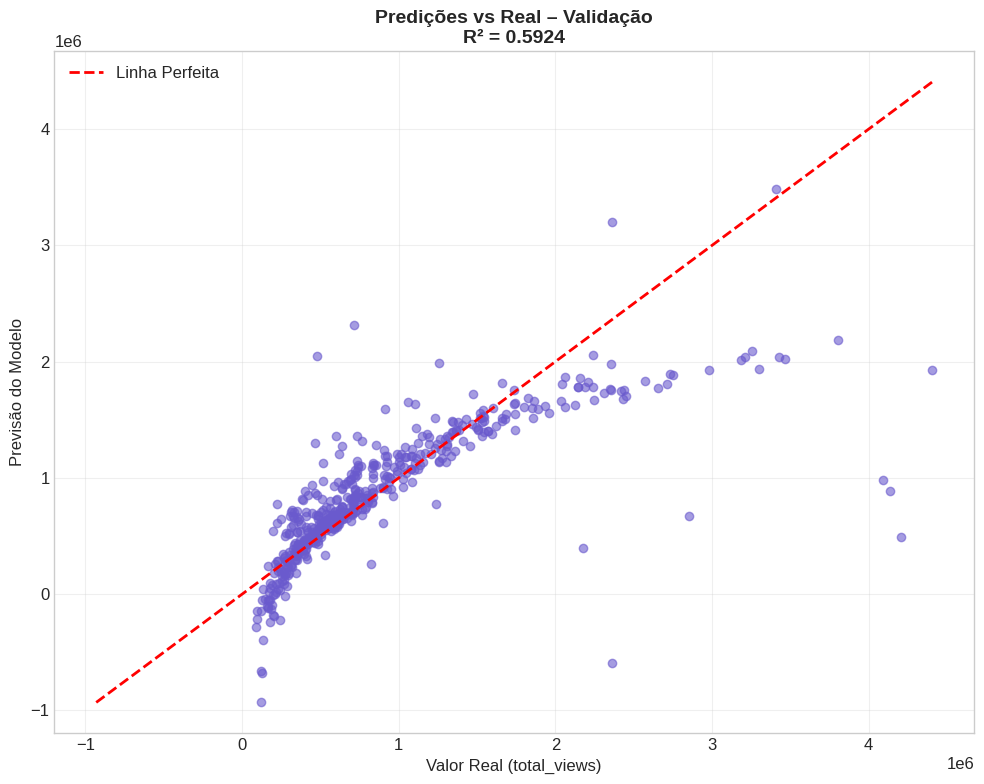

In [22]:
# ===========================================================================
# 6. GRÁFICO 1 – Predições vs Valores Reais
# ===========================================================================
plt.figure(figsize=(10, 8))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='#6A5ACD')
min_val = min(y_val.min(), y_val_pred.min())
max_val = max(y_val.max(), y_val_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Linha Perfeita')
plt.xlabel('Valor Real (total_views)')
plt.ylabel('Previsão do Modelo')
plt.title(f'Predições vs Real – Validação\nR² = {metrics_val["R²"]:.4f}', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('predicoes_vs_real.png', dpi=300, bbox_inches='tight')
plt.show()

/home/ardodue/Documentos/PROJETOS/durval/machine-learning/uninassau-atividade-alunos-ml-regressao/venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


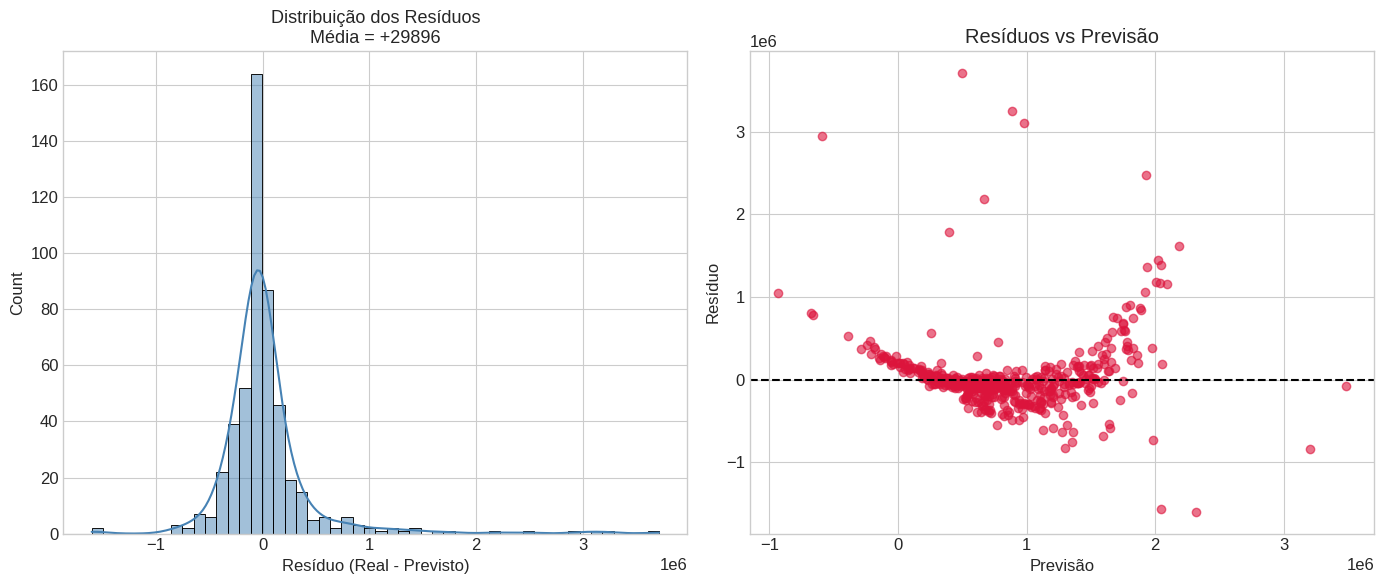

Média dos resíduos: +29896 (ideal ≈ 0)


In [23]:
# ===========================================================================
# 7. GRÁFICO 2 – Distribuição dos Resíduos
# ===========================================================================
residuos = y_val - y_val_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histograma
sns.histplot(residuos, kde=True, bins=50, ax=ax1, color='#4682B4')
ax1.set_title(f'Distribuição dos Resíduos\nMédia = {residuos.mean():+.0f}', fontsize=13)
ax1.set_xlabel('Resíduo (Real - Previsto)')

# Resíduos vs Previsão
ax2.scatter(y_val_pred, residuos, alpha=0.6, color='#DC143C')
ax2.axhline(0, color='black', linestyle='--')
ax2.set_xlabel('Previsão')
ax2.set_ylabel('Resíduo')
ax2.set_title('Resíduos vs Previsão')

plt.tight_layout()
plt.savefig('distribuicao_residuos.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Média dos resíduos: {residuos.mean():+.0f} (ideal ≈ 0)")

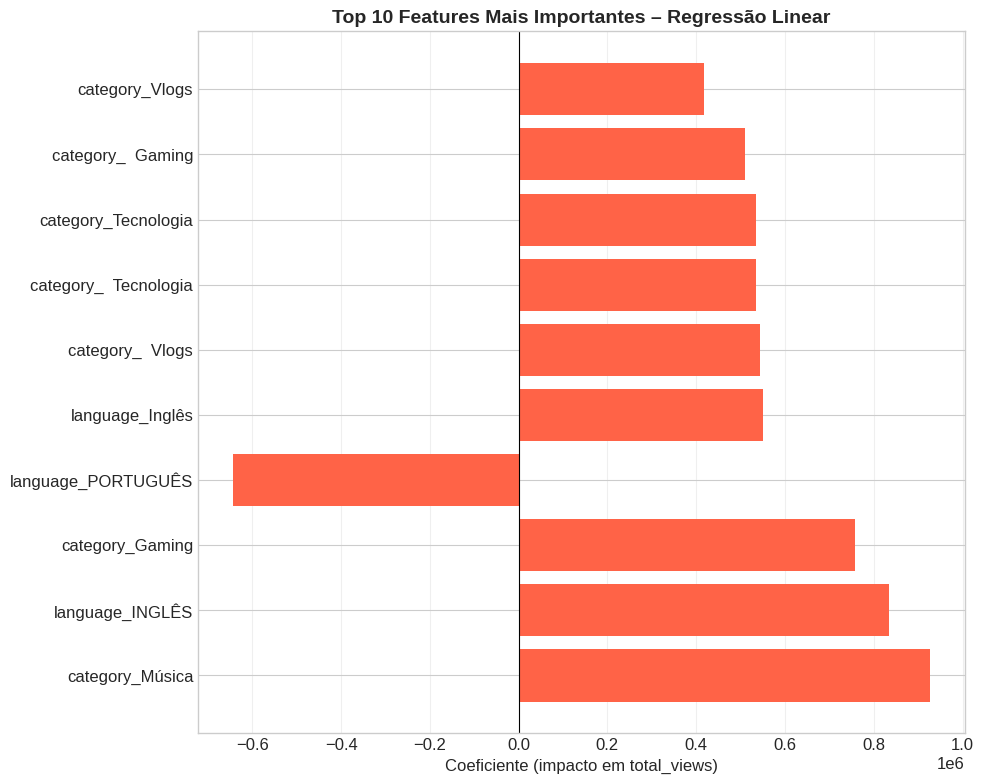

TOP 5 FEATURES MAIS IMPORTANTES:
   30. category_Música                     →     +926,369 views
   34. language_INGLÊS                     →     +833,913 views
   29. category_Gaming                     →     +758,020 views
   36. language_PORTUGUÊS                  →     -643,600 views
   35. language_Inglês                     →     +551,156 views


In [24]:
# ===========================================================================
# 8. GRÁFICO 3 – Importância das Features (Coeficientes)
# ===========================================================================
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

top10 = coef_df.head(10)

plt.figure(figsize=(10, 8))
bars = plt.barh(top10['Feature'], top10['Coeficiente'], color='#FF6347')
plt.xlabel('Coeficiente (impacto em total_views)')
plt.title('Top 10 Features Mais Importantes – Regressão Linear', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('importancia_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("TOP 5 FEATURES MAIS IMPORTANTES:")
for i, row in top10.head(5).iterrows():
    print(f"   {i+1}. {row['Feature']:35} → {row['Coeficiente']:>+12,.0f} views")

In [25]:
# ===========================================================================
# 9. SALVAR O MODELO
# ===========================================================================
os.makedirs('models', exist_ok=True)
joblib.dump(modelo, 'models/baseline_linear_regression.pkl')
print("Modelo baseline salvo → models/baseline_linear_regression.pkl")

Modelo baseline salvo → models/baseline_linear_regression.pkl


In [26]:
# ===========================================================================
# 10. RESUMO FINAL (PRONTO PARA APRESENTAÇÃO)
# ===========================================================================
print("=" * 70)
print("RESUMO FINAL – MODELO BASELINE")
print("=" * 70)
print(f"R²  (Validação) : {metrics_val['R²']:.4f}  →  {metrics_val['R²']*100:5.1f}% da variância explicada")
print(f"RMSE (Validação): {metrics_val['RMSE']:,.0f} views")
print(f"MAE  (Validação): {metrics_val['MAE']:,.0f} views")
print(f"Overfitting     : diferença R² = {diff_r2:.4f} → {'OK' if diff_r2 < 0.10 else 'ATENÇÃO'}")
print("\nTOP 3 FEATURES MAIS IMPORTANTES:")
for i in range(3):
    f = coef_df.iloc[i]
    print(f"   {i+1}. {f['Feature']:35} → {f['Coeficiente']:>+12,.0f} views")
print("\nArquivos gerados:")
print("   • predicoes_vs_real.png")
print("   • distribuicao_residuos.png")
print("   • importancia_features.png")
print("   • models/baseline_linear_regression.pkl")
print("=" * 70)
print("ETAPA 3 CONCLUÍDA COM SUCESSO!")
print("=" * 70)

RESUMO FINAL – MODELO BASELINE
R²  (Validação) : 0.5924  →   59.2% da variância explicada
RMSE (Validação): 459,964 views
MAE  (Validação): 231,979 views
Overfitting     : diferença R² = 0.0003 → OK

TOP 3 FEATURES MAIS IMPORTANTES:
   1. category_Música                     →     +926,369 views
   2. language_INGLÊS                     →     +833,913 views
   3. category_Gaming                     →     +758,020 views

Arquivos gerados:
   • predicoes_vs_real.png
   • distribuicao_residuos.png
   • importancia_features.png
   • models/baseline_linear_regression.pkl
ETAPA 3 CONCLUÍDA COM SUCESSO!
